# Intro
In this assignement you will see a little example about
*   How to download a dataset
*   How to load it into dataframes
*   How to use extract basic features from the corpus
*   How to train a classifier on those features

You are advised to look at the code and understand it.

You will be then asked to perform feature extraction and classification yourself.

The task that will be addressed is document classification, specifically tasks related to sentiment classification.


# Document Classification Tutorial

## Preliminary Steps
These are some preliminary steps before addressing the task.
Import some basic libraries and set a variable that will be used in multiple steps.

In [1]:
# The libraries we will use are imported here, in case of runtime problems
import os, shutil  #  file management
import sys
import pandas as pd  #  dataframe management
import numpy as np  #  data manipulation

In [2]:
dataset_name = "aclImdb"

CHANGED: If it is necessary, clean all the data that are in the DATASETS directory and wipe out all the subdirectories.

IMPORTANT: DO NOT RUN THIS SECTION UNLESS YOU NEED IT.


In [ ]:
folder = os.getcwd()

print("Current work directory: " + str(folder))

dataset_folder = os.path.join(os.getcwd(), "Datasets")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

for filename in os.listdir(dataset_folder):
    file_path = os.path.join(dataset_folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

print("Cleaned")

Current work directory: /content
Cleaned


## Dataset Download
Dowload the Imdb movie reviews dataset


In [3]:
import urllib.request  #  download files
import tarfile  #  unzip files

dataset_folder = os.path.join(os.getcwd(), "Datasets", "Original")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

url = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset_path = os.path.join(dataset_folder, "Movies.tar.gz")

if not os.path.exists(dataset_path):
    urllib.request.urlretrieve(url, dataset_path)
    print("Successful download")

tar = tarfile.open(dataset_path)
tar.extractall(dataset_folder)
tar.close()
print("Successful extraction")

Successful extraction


Look at the files you have downloaded to understand the structure of the dataset.

## Create the dataframe
Now the dataset is loaded into a dataframe to be more accessible.
During the creation some data will be printed as an example.

In [4]:
dataset_name = "aclImdb"

debug = True

dataframe_rows = []

for split in ['train', 'test']:
    for sentiment in ['pos', 'neg']:
        folder = os.path.join(os.getcwd(), "Datasets", "Original", dataset_name, split, sentiment)
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            try:
                if os.path.isfile(file_path):
                    # open the file
                    with open(file_path, mode='r', encoding='utf-8') as text_file:
                        # read it and extract informations
                        text = text_file.read()
                        score = filename.split("_")[1].split(".")[0]
                        file_id = filename.split("_")[0]

                        num_sentiment = -1

                        if sentiment == "pos" : num_sentiment = 1
                        elif sentiment == "neg" : num_sentiment = 0

                        # create single dataframe row
                        dataframe_row = {
                            "file_id": file_id,
                            "score": score,
                            "sentiment": num_sentiment,
                            "split": split,
                            "text": text
                        }

                        # print detailed info for the first file
                        if debug:
                            print(file_path)
                            print(filename)
                            print(file_id)
                            print(text)
                            print(score)
                            print(sentiment)
                            print(split)
                            print(dataframe_row)
                            debug = False
                        dataframe_rows.append(dataframe_row)

            except Exception as e:
                print('Failed to process %s. Reason: %s' % (file_path, e))
                sys.exit(0)

folder = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name)
if not os.path.exists(folder):
    os.makedirs(folder)

# transform the list of rows in a proper dataframe
dataframe = pd.DataFrame(dataframe_rows)
dataframe = dataframe[["file_id",
                       "score",
                       "sentiment",
                       "split",
                       "text"]]
dataframe_path = os.path.join(folder, dataset_name + ".pkl")
dataframe.to_pickle(dataframe_path)

/Users/buio/ai/nlp_torroni/Datasets/Original/aclImdb/train/pos/4715_9.txt
4715_9.txt
4715
For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.
9
pos
train
{'file_id': '4715', 'score': '9', 'sentiment': 1, 'split': 'train', 'text': 'For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.'}


Little analysis of the dataframe

In [5]:
dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

print("Dataframe structure:")
print(df)
print()


print("Total rows %d" % (len(df)))
print()

column = 'score'
print("Distribution of scores: ")
print(df[column].value_counts())
print()

column = 'sentiment'
print("Distribution of sentiment: ")
print(df[column].value_counts())
print()


for split in ["train", "test"]:
    df1 = df.loc[df['split'] == split]
    column = 'score'
    print("Distribution of scores in %s: " % (split))
    print(df1[column].value_counts())
    print()

Dataframe structure:
      file_id score  sentiment  split  \
0        4715     9          1  train   
1       12390     8          1  train   
2        8329     7          1  train   
3        9063     8          1  train   
4        3092    10          1  train   
...       ...   ...        ...    ...   
49995   11513     1          0   test   
49996    5409     1          0   test   
49997   11187     1          0   test   
49998    9359     3          0   test   
49999   11556     1          0   test   

                                                    text  
0      For a movie that gets no respect there sure ar...  
1      Bizarre horror movie filled with famous faces ...  
2      A solid, if unremarkable film. Matthau, as Ein...  
3      It's a strange feeling to sit alone in a theat...  
4      You probably all already know this by now, but...  
...                                                  ...  
49995  With actors like Depardieu and Richard it is r...  
49996  If you 

A little game: let's create a word cloud for the two sentiments and see if there is something interesting.

Negative:


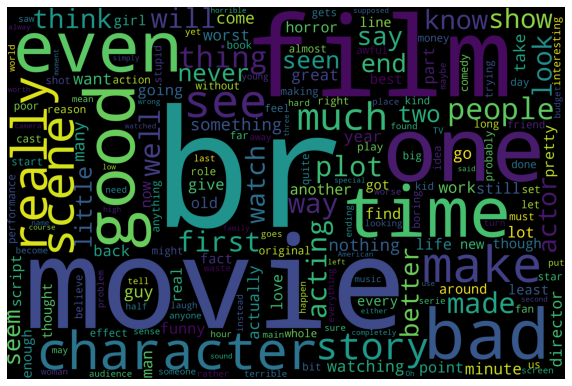

Positive:


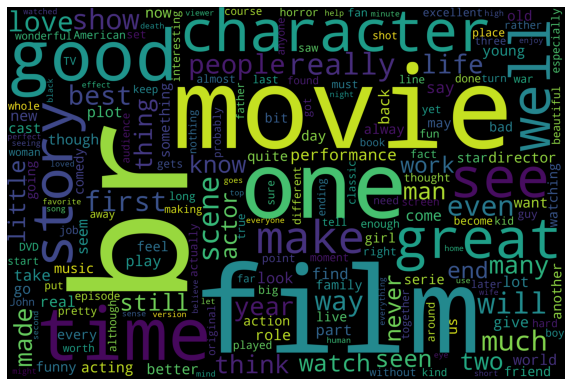

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

positive_corpus = df.loc[df['sentiment'] == 1]
positive_corpus = positive_corpus["text"].tolist()

negative_corpus = df.loc[df['sentiment'] == 0]
negative_corpus = negative_corpus["text"].tolist()

print("Negative:")
wordcloud1 = WordCloud(width = 3000, height = 2000, collocations=False, stopwords = STOPWORDS).generate(" ".join(negative_corpus))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud1) 
plt.axis("off");
plt.show()

print("Positive:")
wordcloud2 = WordCloud(width = 3000, height = 2000, collocations=False, stopwords = STOPWORDS).generate(" ".join(positive_corpus))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud2) 
plt.axis("off");
plt.show()

Is there something weird about these words? You can repeat the process multiple times to test your observations.
Is there something that will influence our approach? Think about it...

## Features extraction
Let's tackle the Sentiment Analysis task.

The scikit-learn library offers *TfidfVectorizer*, a class that performs both tokenization and the creation of the BoW representation (as tf-idf) of a corpus.

The class has plenty of options: it can be used also to count n-grams, excluding stop-words, and cutting off most and/or less frequent terms.

In [7]:
from sklearn.feature_extraction.text import  TfidfVectorizer

dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

# select only the training sentences
df_train = df.loc[df['split'] == "train"]

train_corpus = df_train['text'].tolist()

print("Processing corpus\n")
vectorizer =  TfidfVectorizer()
# tokenization and creation of Bag of Words representation
X_train = vectorizer.fit_transform(train_corpus)

print("Shape of the matrix: (data points, features)")
print(X_train.shape)
print()

# targets for the training set
Y_train = np.array(df_train['sentiment'].tolist())

Processing corpus

Shape of the matrix: (data points, features)
(25000, 74849)



Fitting on a corpus, the vectorizer creates an internal vocabulary that will be used to create the BoW representation.
The vocabulary is a dictionary that associates to each word a corresponding column in the feature matrix.

Do not try to print the whole vocabulary: it is quite large ;)

In [8]:
print(len(vectorizer.vocabulary_))

74849


Since the vocabulary will be quite big, by default X will be a *sparse* matrix (see scipy.sparse for more info).

In [9]:
print(X_train)

  (0, 59148)	0.23132510204077741
  (0, 50646)	0.13870298022191505
  (0, 4465)	0.044752214927255805
  (0, 35627)	0.1738357263772272
  (0, 29499)	0.232920390954242
  (0, 60644)	0.2744406798467878
  (0, 2464)	0.17483105340217164
  (0, 72246)	0.07836971715820786
  (0, 58249)	0.17719431504151084
  (0, 1316)	0.16531997710495755
  (0, 3167)	0.05338785322586328
  (0, 11615)	0.08213759604942969
  (0, 43900)	0.295998468749793
  (0, 66339)	0.06271979139191741
  (0, 63002)	0.2618301817400671
  (0, 57873)	0.08946521430485957
  (0, 62846)	0.26397595077879615
  (0, 41471)	0.2305571293149028
  (0, 26385)	0.0956071932629885
  (0, 1670)	0.09275289971363593
  (0, 34585)	0.10344144092555613
  (0, 50102)	0.25982294885531104
  (0, 35415)	0.15971167742023334
  (0, 72757)	0.08259022192991332
  (0, 32667)	0.14261946910338497
  :	:
  (24999, 10357)	0.05481195239488788
  (24999, 47612)	0.07450263297839073
  (24999, 46050)	0.08495111797725328
  (24999, 47142)	0.05279145027583143
  (24999, 63422)	0.061352297865039

All the scipy tools are compatible with sparse matrices, but if you somehow need the traditional representation it is possible to convert it with the following command. Keep in mind that if the vocabulary and/or the dataset are large, the resulting array will be quite large, possibly occupying all the RAM.


```
X.toarray()
```



It is then possible to parse the test split likewise. Remember to use the transform function and not the fit_transform when working on the test set.

In [10]:
# select only the test sentences
df_test = df.loc[df['split'] == "test"]
test_corpus = df_test['text'].tolist()
X_test = vectorizer.transform(test_corpus)
Y_test = np.array(df_test['sentiment'].tolist())

## Training and Testing
It is now possible to choose one of the many models available in the sci-kit learn library, train it and test it.

In [11]:
# training and testing
from sklearn.svm import LinearSVC

classifier = LinearSVC()

classifier.fit(X_train, Y_train)

Y_pred_train = classifier.predict(X_train)
Y_pred_test = classifier.predict(X_test)

In [12]:
# print results
from sklearn.metrics import classification_report

report_train = classification_report(Y_train, Y_pred_train, target_names=["neg", "pos"])
report_test = classification_report(Y_test, Y_pred_test, target_names=["neg", "pos"])
print("Train")
print(report_train)
print("Test")
print(report_test)

Train
              precision    recall  f1-score   support

         neg       0.99      0.99      0.99     12500
         pos       0.99      0.99      0.99     12500

    accuracy                           0.99     25000
   macro avg       0.99      0.99      0.99     25000
weighted avg       0.99      0.99      0.99     25000

Test
              precision    recall  f1-score   support

         neg       0.87      0.89      0.88     12500
         pos       0.89      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



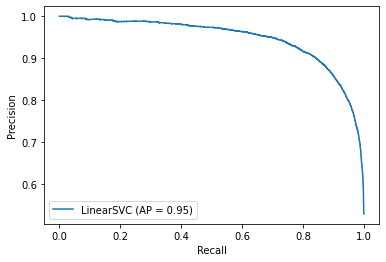

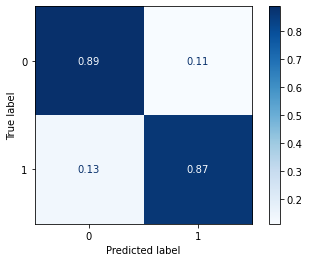

In [13]:
# more advanced tools
# plot precision/recall curve and confusion matrix
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, Y_test)
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")

# Now...do it yourself!

Now, rather then sentiment classification, try to address the task of score prediction on the same dataset: based on the text of the reviews, try to predict the score assigned by the reviewer.

## First part
As first part, experiment with the options of the vectorizer to improve the classification using logistic regression. You are required to look at the documentation of the functions.
You can also use or add other pre-processing steps to the text if you feel like it, you are not obliged to use TfidfVectorizer.

Obviously, you will need to use the variable names declared in the first block, so to make our evaluation blocks work.


Some notes:
* Between the problem as regression and the problem as multi-class classification, the priority is the problem as regression. Indeed, the classification perspective does penalize each error in the same way, while the regression perspective considers the difference between the predicted value and the real value (prediction 8 for real value 2 is way worse than prediction 3 for value 2). The classification perspective is a tool to understand the problem better and experiment.
* In the multi-class classification, the most important measures are F1s (especially macro and micro), since it is a complex measure that considers more aspects than the simple accuracy. 
* It is not unusual to not reach a "satisfying" score, especially in the first step: our code makes use of a pretty simple classifier. Our purpose is to show you both the impact of the pre-processing and the choice of the classifier.
* There are no threshold values that you have to reach with the measurements to obtain a certain score. The score will be assigned based on the correctness of the methodology and the extent to which different solutions have been explored and discussed.
* In each code section, you have to deliver a single approach, but if you have observations or interesting alternative approaches, you can mention them in the .txt file

### Preprocessing

We preprocess the reviews for text normalization, fundamental for further use of the data.

#### Tokenization
We explore diffrent tokenization methods:
- TfIdfVectorizer default regex '(?u)\\b\\w\\w+\\b' separates tokens by whitespaces and removes single chars.
- nltk.word_tokenize() uses Penn Treebank algorithm, importantly for us: it preserves digits and ratios like: "10/10". This is found useful for classification.  
- Tf max document frequency and min document frequency are tweaked to remove unuseful or too specific tokens.  
A conservative max_df=0.98 is chosen to remove most common tokens without much risk.

#### Lemmatization
"Crude" stemming is used for lemmatizing, Porter and Pystemmer are tested.

#### Negation handling
Negations are handled by prepending 'NOT_' to tokens between negation identifiers and punctuation.

#### Evaluation
Evaluation of the preprocessing techniques is done in an extrinsic way, considering their effect on the classification task  with a baseline logistic regression classifier.  
We focus on averaged f1-score and weighted f1-score, as classes are imbalanced.


#### Considerations
Toikenization with a single regex pattern is greatly faster than other methods.  
However nltk.word_tokenize improves f1-scores by a considerable ~0.05.  
Stemming has also a positive impact on the results.


In [178]:
# implement custom preprocessors, show their effect on a single review

import nltk # for advanced tokenization
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer # for stemming
import Stemmer # PyStemmer alternative stemmer


def nltk_token_stem(text):
    """tokenize with nltk recommended word tokenizer and stem with Porter"""
    
    tokens = nltk.word_tokenize(text)
    
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item))
    return stems


def tokenize_stem_neg(text):
    """tokenize with nltk recommended word tokenizer, stem with PyStemmer and handle negations"""
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if '/' not in word and not word.isdigit()]
    
    stems = []
    stemmer = Stemmer.Stemmer('english')
    for item in tokens:
        stems.append(stemmer.stemWord(item.lower()))

    # handle negations by prepending 'NOT_' to tokens between negation identifiers and punctuation
    
    negations=["not", "n't", "no", "never"]
    punctuation=[".",",",";","!","?",":"]
    
    neg_flag=False
    processed_text=[]
    for stem in stems:
        if neg_flag and stem in punctuation:
            neg_flag=False
            
        if neg_flag:
            processed_text.append(f'NOT_{stem}')
        else:
            processed_text.append(stem)
            
        if stem in negations:
            neg_flag=True
    
    # removes single char tokens
    out_text = []
    for t in processed_text:
        if len(t) > 1:
            out_text.append(t)
    
    return out_text


def plot_potts(classifier, vectorizer):
    """plots Potts diagrams for positive, negative and weak adjectives"""
    
    sentiment_words = ['good','disappointing','great','bad','excellent','terrible',
                       'totally','somewhat','absolutely','fairly','pretty','utterly']
    
    sorted_indeces = dict()
    for i in range(8):
        sorted_indeces[i] = classifier.coef_[i].argsort()[::-1]

    inv_map = {v: k for k, v in vectorizer.vocabulary_.items()}
    
    score_names = [1,2,3,4,7,8,9,10]
    
    print("First 10 tokens that positively relates with each class",end='\n\n')
    for score in range(len(score_names)):
        print('score',score_names[score],end=' ')
        for i in range(10):
            print(inv_map[sorted_indeces[score][i]],end=' ')
        print()

    sentiment_words_stem = list(vectorizer.build_tokenizer()(' '.join(sentiment_words)))

    for word in sentiment_words_stem:
        word_scores = dict()
        scores = []
        for i in range(8):
            scores.append(classifier.coef_[i,vectorizer.vocabulary_[word]])
        word_scores[word] = scores
        plt.title(word)
        plt.plot(score_names,scores)
        plt.show()
        
review = train_corpus[0]
print('Original review text:')
print(review,end='\n\n')
print('Tokenization with nltk and Porter stemming:')
print(' '.join(nltk_token_stem(review)),end='\n\n')
print('Simple handling of negation')
print(' '.join(tokenize_stem_neg(review)),end='\n\n')
print('Review score:',df_train.loc[0].score)

Original review text:
For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.

Tokenization with nltk and Porter stemming:
for a movi that get no respect there sure are a lot of memor quot list for thi gem . imagin a movi where joe piscopo is actual funni ! maureen stapleton is a scene stealer . the moroni charact is an absolut scream . watch for alan `` the skipper '' hale jr. as a polic sgt .

Simple handling of negation
for movi that get no NOT_respect NOT_there NOT_sure NOT_are NOT_a NOT_lot NOT_of NOT_memor NOT_quot NOT_list NOT_for NOT_this NOT_gem imagin movi where joe piscopo is actual funni maureen stapleton is scene stealer the moroni charact is an absolut scream watch for alan `` the skipper '' hale jr. as polic sgt

Review score: 9


[nltk_data] Downloading package punkt to /Users/buio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1]:
# write your code here
Y_train = np.array(df_train['score'].tolist()).astype(dtype='int')
Y_test = np.array(df_test['score'].tolist()).astype(dtype='int')

vectorizer = TfidfVectorizer(tokenizer=tokenize_stem_neg, max_df=0.98, min_df=0.1, binary=True)

print("Processing corpus:", end=' ')
X_train = vectorizer.fit_transform(train_corpus)
X_test = vectorizer.transform(test_corpus)
print("done!")
print("X Y Train Test shapes:", X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

NameError: name 'np' is not defined

Now run the code below to train your classifier:

In [208]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000)

classifier.fit(X_train, Y_train)

Y_pred_test = classifier.predict(X_test)
Y_pred_test_class = np.around(Y_pred_test)

####################################################################

Now test your results running the code below:

R2 score 0.497971
MAE 1.433040
MSE 6.117680

              precision    recall  f1-score   support

           1       0.54      0.79      0.64      5022
           2       0.27      0.11      0.15      2302
           3       0.32      0.19      0.24      2541
           4       0.34      0.32      0.33      2635
           7       0.34      0.29      0.32      2307
           8       0.30      0.28      0.29      2850
           9       0.28      0.11      0.16      2344
          10       0.51      0.73      0.60      4999

    accuracy                           0.44     25000
   macro avg       0.36      0.35      0.34     25000
weighted avg       0.40      0.44      0.40     25000

[[3985  229  211  252   41   56   15  233]
 [1264  247  239  313   42   50   10  137]
 [ 923  193  483  536  118   96   25  167]
 [ 624  153  345  847  238  184   34  210]
 [ 113   37   89  245  674  502  109  538]
 [ 134   13   69  129  444  808  209 1044]
 [ 105   11   28   80  189  472  250 1209]
 [ 

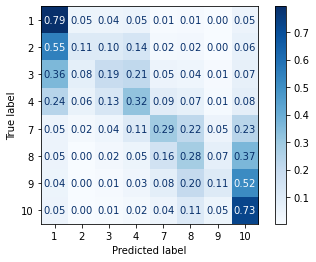

In [209]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


# task as regression

print("R2 score %f" % (r2_score(Y_test, Y_pred_test)))
print("MAE %f" % (mean_absolute_error(Y_test, Y_pred_test)))
print("MSE %f" % (mean_squared_error(Y_test, Y_pred_test)))
print()

# task as multiclass classification

report = classification_report(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(report)

confusion_matrix = confusion_matrix(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(confusion_matrix)
print()

# fancy confusion matrix
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")

####################################################################

#### Interpretation of results
One invaluable advantage of the LogisticRegression classifier relies in it's interpretability.  
Every token is assigned a weigh for each class, thus allowing introspection on the learned features importance.  
- The "common sense" of the Logistic regressor is clear: negative words are in the low scores and viceversa.  
- LR is trickly making use of the stated score, because this is frequently present in the review text itself.  
- Attenuator words like "disappoint", "nice", "pretti" (stemmed) are clearly relevant in mild score review  

#### Potts 
Further below, we reproduce the results of Christopher Potts word sentiment on the provided Imdb dataset!

First 10 tokens that positively relates with each class

score 1 worst bad aw 1/10 wast terribl NOT_even avoid horribl money 
score 2 2/10 bad worst horribl lame bore suppos fail NOT_even terribl 
score 3 3/10 disappoint poor bore wast NOT_save 1/2 decent mediocr bad 
score 4 4/10 dull disappoint unfortun pretti problem too four NOT_good NOT_recommend 
score 7 7/10 worth fun enjoy good bit entertain nice though solid 
score 8 8/10 great enjoy delight excel surpris definit unusu veri good 
score 9 9/10 great perfect brilliant amaz excel superb recommend you nine 
score 10 10/10 best love excel great favorit perfect amaz masterpiec ever 


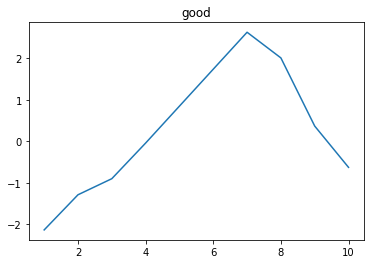

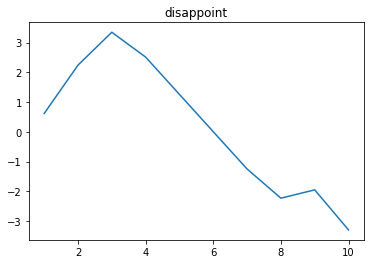

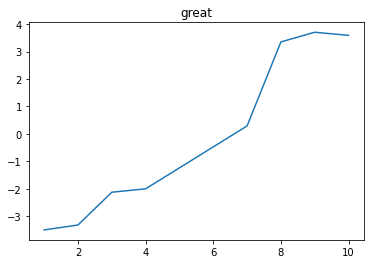

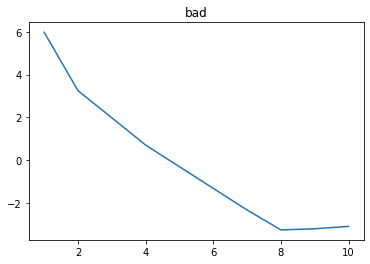

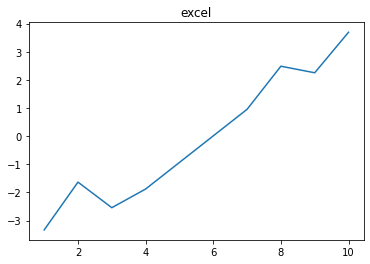

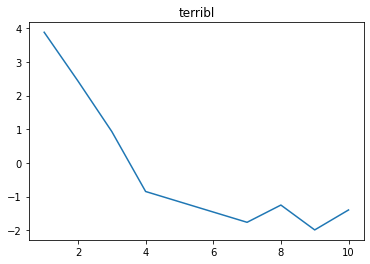

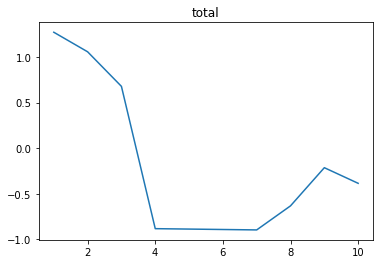

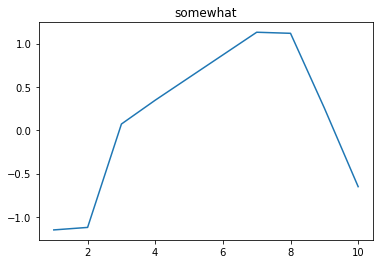

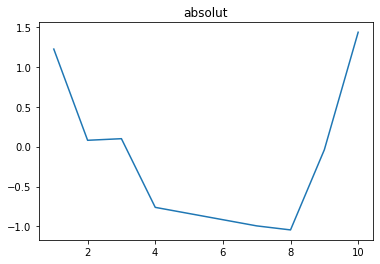

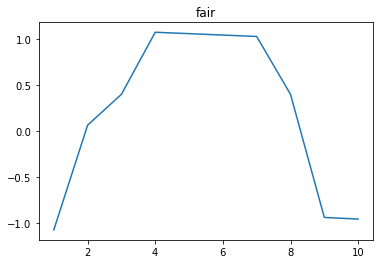

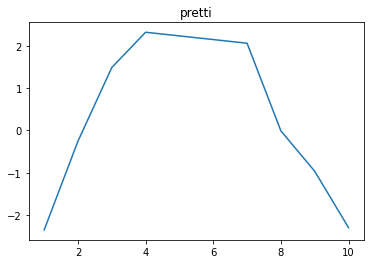

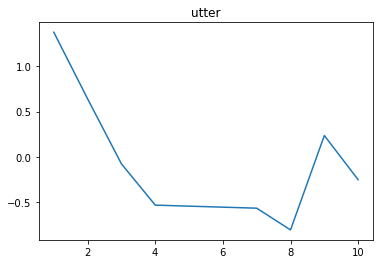

In [210]:
plot_potts(classifier, vectorizer)

## Second part
Now experiment both with the processing (the vectorizer) and the classifier to obtain the best result.

#### Considerations:

#### on LogisticRegression
The invaluable advantage of logistic regression classifier is in it's interpretability, as already presented

#### on Naive Bayes
We explored MultinomialNB and ComplementNB, reported better on text classification in the scikit-learn documentation.
Naive Bayes classifier does worse than LR, probably due to the many features.  
Binarization impact is risible, contrary to what the theory suggests.
However, the lack of an optimization step makes it a very-fast baseline.

#### on Multi Layer Perceptron
We handle overfitting by early stopping,
going deeper with the model has no impact, this is probably due to the "flattened" bag-of-words representation of text, that removes any learnable hierarchical structure in the inherently sequential text data.


#### In conclusion
Our best LogisticRegression and MLPClassifier perform very similar:  
with a top f1-score of 0.37, f1-weighted of 0.41 and accuracy of 0.45.  
Our experimentation shows that no bigger improvement can be achieved with a Bag of Words representation of the documents, without very application-related fine tuning of the preprocessor.  

This somewhat mild reult forces us to think of better feature representations and learning algorithms to takle the classification task.

In [188]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB, ComplementNB
#from sklearn.linear_model import LogisticRegressionCV

classifier = GridSearchCV(MLPClassifier(early_stopping=True, n_iter_no_change=2),
                          param_grid={'hidden_layer_sizes':[(10),(15),(20),(40),(80)], 'activation':['logistic','relu']},
                          cv=10, verbose=1, n_jobs=-1, scoring='f1_weighted')

Run the code below to train your classifier, then test it with the block that follows.

In [189]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
classifier.fit(X_train, Y_train)
Y_pred_train = classifier.predict(X_train)
Y_pred_test = classifier.predict(X_test)
Y_pred_test_class = np.around(Y_pred_test)
####################################################################

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished


In [190]:
classifier.best_estimator_

MLPClassifier(early_stopping=True, hidden_layer_sizes=40, n_iter_no_change=2)

R2 score 0.521047
MAE 1.392560
MSE 5.836480

              precision    recall  f1-score   support

           1       0.53      0.83      0.65      5022
           2       0.31      0.02      0.05      2302
           3       0.33      0.11      0.16      2541
           4       0.33      0.47      0.39      2635
           7       0.38      0.24      0.29      2307
           8       0.29      0.31      0.30      2850
           9       0.44      0.01      0.03      2344
          10       0.49      0.78      0.61      4999

    accuracy                           0.44     25000
   macro avg       0.39      0.35      0.31     25000
weighted avg       0.41      0.44      0.38     25000

[[4156   54  161  338   20   47    1  245]
 [1397   57  163  474   24   47    1  139]
 [1014   38  278  872   66   93    0  180]
 [ 629   22  189 1227  163  195    0  210]
 [ 112    2   24  369  550  636   12  602]
 [ 122    3   17  197  370  891   17 1233]
 [ 117    5    7   96  142  549   35 1393]
 [ 

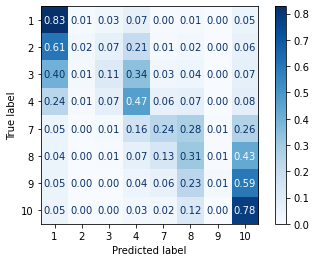

In [192]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


# task as regression

print("R2 score %f" % (r2_score(Y_test, Y_pred_test)))
print("MAE %f" % (mean_absolute_error(Y_test, Y_pred_test)))
print("MSE %f" % (mean_squared_error(Y_test, Y_pred_test)))
print()

# task as multiclass classification

report = classification_report(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(report)

confusion_matrix = confusion_matrix(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(confusion_matrix)
print()

# fancy confusion matrix
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")
####################################################################

Credits:
Andrea Galassi,
Federico Ruggeri,
Paolo Torroni
(Oct 2020)